# Regression between sea level height and the timmerman wind data regions for observational data

This regression can either be performed using observational or model (cmip6) data.
When observational or cmip6 data is used, functions containing respectively 'obs' or 'cmip6' should be used.


For each sea level datapoint, a wind stress data point located nearest to the sea level point to perform a regression.

In this notebook, functions are used from: 

'/code/import_data.py' 

'/code/regression.py' 

'/code/figures.py' 

In [87]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Github/Thesis-KNMI/Wind_contribution/Analysis/code')

import import_data as imprt
import regression as regres
import figures as figs


data_type = 'era5'
model = 'Timmerman'

begin = 1850
end = 2014
period = f'{begin}-{end}'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Plot Timmerman regions

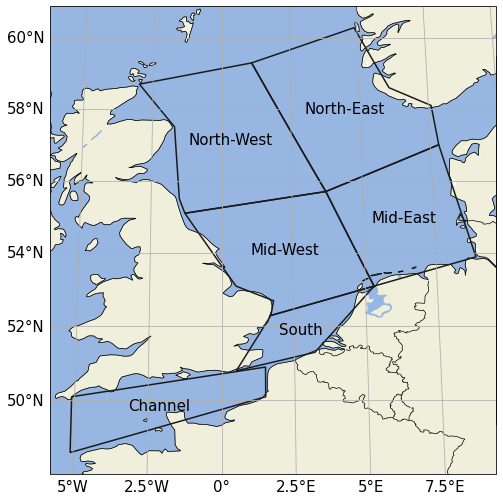

In [88]:
figs.timmerman_regions_plot(period = period)

#### Import and plot tide gauge data

In [89]:
# Open data file
tg_data = imprt.import_obs_slh_data()

tg_data = tg_data.loc[1950:2014]

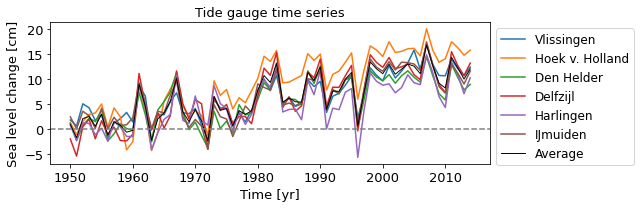

In [90]:
figs.plot_tg_data(tg_data, period = period)

#### Import and plot nearby wind data

In [91]:
wind_data_era5 = imprt.import_obs_wind_data(model = model, data_type = data_type)

wind_data_era5 = wind_data_era5.loc[1950:2014]

In [92]:
wind_data_era5

Channel                South              Mid-West             \
          u$^2$     v$^2$      u$^2$      v$^2$      u$^2$      v$^2$   
time                                                                    
1950  12.350291  2.171068   8.262183   4.041305   8.584405   4.609705   
1951   9.173002  3.294943   4.721186   6.609374   6.462471   7.438522   
1952   7.513128 -0.765219   5.772462   0.936855   7.444201  -0.193246   
1953   4.369887  0.869921   5.077993   2.553824   7.646784   3.443362   
1954  13.193830  0.525023  13.136430   2.714039  13.472046   3.240453   
...         ...       ...        ...        ...        ...        ...   
2010   2.567966 -1.317346   1.924042  -1.166861   1.462218  -0.908323   
2011  12.488993  2.758098   9.419878   4.171514  12.071996   6.447071   
2012   9.970165  1.607475   6.785618   2.743623   8.543833   2.061403   
2013   4.106581  0.738007   1.964055   2.721578   3.242756   4.025872   
2014  12.403391  6.351071   5.918859  10.631058   6.872709  12.277523   

       Mid-East            North-West            North-East             
          u$^2$      v$^2$      u$^2$      v$^2$      u$^2$      v$^2$  
time                                                                    
1950   8.101027   2.522368   7.013565   7.557420   3.963465   5.090486  
1951   6.362149   5.580308   5.833830   9.635615   2.495542   9.651013  
1952   8.791636  -0.327027   7.919094  -1.071391   5.058083   0.185943  
1953   9.280859   2.147830   8.386577   5.926245   6.155785   4.151612  
1954  10.562153   4.062375   8.128158   4.496390   3.434881   5.007951  
...         ...        ...        ...        ...        ...        ...  
2010   0.932195  -2.098675   0.699844  -0.340041  -1.341337  -2.015442  
2011  12.028640   5.101478  11.800364  11.121502   8.742876   7.568037  
2012   8.995051   1.644223   9.432439   0.738233   5.887941   1.073906  
2013   4.499206   2.849391   5.624363   6.625647   4.459720   3.999826  
2014   5.060391  10.587664   5.768942  14.545545   0.405425  12.790295  

[65 rows x 12 columns]

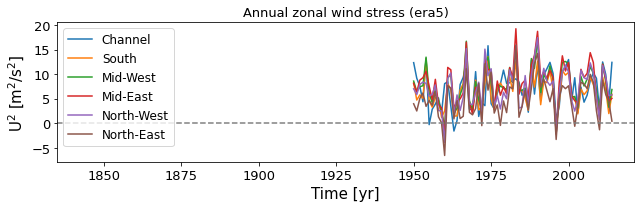

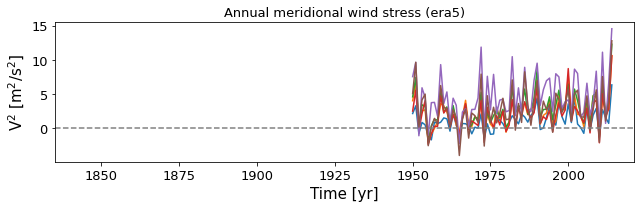

In [93]:
figs.plot_obs_wind_data(wind_data_era5, model = model, data_type = data_type, period = period)

### Perform regression

In [94]:
results_era5, timeseries_era5, significance_era5, r2_df = regres.regression_obs(wind_data_era5, tg_data, wind_model = model, data_type = data_type)

In [95]:
r2_df

,R$^2$,R$^2_{wind}$,R$^2_{u^2}$,R$^2_{v^2}$,R$^2_{tr}$,R$^2_{adj}$,"R$^2_{adj, wind}$","R$^2_{adj, u^2}$","R$^2_{adj, v^2}$","R$^2_{adj, tr}$"
station,,,,,,,,,,
Vlissingen,0.77914,0.209497,0.246603,0.000013,0.630878,0.760423,0.142505,0.182756,-0.084731,0.599597
Hoek v. Holland,0.900054,0.232384,0.273538,0.016996,0.73039,0.885776,0.122724,0.169758,-0.123433,0.691874
Den Helder,0.789424,0.368144,0.354552,0.071087,0.519378,0.76764,0.30278,0.287782,-0.025007,0.469658
Delfzijl,0.815299,0.325851,0.338056,0.000031,0.586741,0.799647,0.26872,0.28196,-0.084713,0.551719
Harlingen,0.793564,0.486551,0.492744,0.003714,0.417836,0.764073,0.413201,0.420279,-0.138613,0.33467
IJmuiden,0.75971,0.296871,0.294536,0.032345,0.563121,0.739347,0.237284,0.234751,-0.04966,0.526098
Average,0.858231,0.332771,0.354681,0.003113,0.624147,0.843565,0.263747,0.287924,-0.100014,0.585266


In [96]:
results_era5

,R$^2$,R$^2_{wind}$,R$^2_{u^2}$,R$^2_{v^2}$,RMSE,constant,Channel u$^2$,Channel v$^2$,South u$^2$,South v$^2$,Mid-West u$^2$,Mid-West v$^2$,Mid-East u$^2$,Mid-East v$^2$,North-West u$^2$,North-West v$^2$,North-East u$^2$,North-East v$^2$,trend
station,,,,,,,,,,,,,,,,,,,
Vlissingen,0.778673,0.209416,0.246508,0.000000,2.123179,6.533938,0.364852,0.000000,-0.000000,0.000000,0.0,0.0,1.176460,0.0000,0.141046,-0.602859,-0.0,0.000000,3.362465
Hoek v. Holland,0.899915,0.232375,0.273529,0.016912,1.952433,9.038244,0.460009,0.300919,0.421636,-0.752209,0.0,-0.0,1.835659,-0.0616,0.000000,-0.328093,0.0,-0.000000,5.021075
Den Helder,0.788588,0.368085,0.354478,0.070281,2.131907,5.583811,0.139744,0.468600,0.503387,0.000000,0.0,0.0,1.558547,-0.0000,0.000000,-0.818764,-0.0,-0.000000,2.966130
Delfzijl,0.812551,0.325625,0.337822,0.000000,2.474025,6.477859,0.000000,0.000000,0.063992,0.000000,0.0,-0.0,2.286169,-0.0000,0.161190,-0.000000,0.0,-0.334625,3.840367
Harlingen,0.792466,0.486488,0.492678,0.000000,2.142042,4.942971,0.241832,0.075264,0.920676,0.000000,0.0,-0.0,0.524126,-0.0000,1.331048,-0.331097,0.0,-0.040826,2.543187
IJmuiden,0.757617,0.296630,0.294254,0.028211,2.353114,6.419811,0.269055,0.273083,0.000000,0.000000,0.0,0.0,1.653362,0.0000,0.000000,-0.598484,-0.0,-0.000000,3.167621
Average,0.857913,0.332744,0.354651,0.002620,1.845178,6.499439,0.351157,0.111499,0.095598,-0.000000,0.0,-0.0,1.909235,-0.0000,0.000000,-0.606334,0.0,-0.000000,3.525387


In [97]:
timeseries_era5

Vlissingen                                                       \
     Channel u$^2$ Channel v$^2$ South u$^2$ South v$^2$ Mid-West u$^2$   
time                                                                      
1950      0.488913           0.0        -0.0         0.0            0.0   
1951      0.194794           0.0         0.0         0.0           -0.0   
1952      0.041141          -0.0         0.0        -0.0           -0.0   
1953     -0.249826          -0.0         0.0         0.0           -0.0   
1954      0.566999          -0.0        -0.0         0.0            0.0   
...            ...           ...         ...         ...            ...   
2010     -0.416628          -0.0         0.0        -0.0           -0.0   
2011      0.501752           0.0        -0.0         0.0            0.0   
2012      0.268587           0.0        -0.0         0.0            0.0   
2013     -0.274200          -0.0         0.0         0.0           -0.0   
2014      0.493828           0.0         0.0         0.0           -0.0   

                                                                    \
     Mid-West v$^2$ Mid-East u$^2$ Mid-East v$^2$ North-West u$^2$   
time                                                                 
1950            0.0       0.002439            0.0        -0.007846   
1951            0.0      -0.472497            0.0        -0.048376   
1952           -0.0       0.191064           -0.0         0.023263   
1953            0.0       0.324684            0.0         0.039323   
1954            0.0       0.674641            0.0         0.030445   
...             ...            ...            ...              ...   
2010           -0.0      -1.955568           -0.0        -0.224751   
2011            0.0       1.075179            0.0         0.156602   
2012           -0.0       0.246622           -0.0         0.075253   
2013            0.0      -0.981318            0.0        -0.055572   
2014            0.0      -0.828043            0.0        -0.050605   

                       ...   Average                                           \
     North-West v$^2$  ...     trend     total wind total   Channel     South   
time                   ...                                                      
1950        -0.522025  ... -6.012920 -5.936444   0.076476  0.545268  0.052284   
1951        -0.890634  ... -5.825017 -7.195910  -1.370893  0.342540 -0.050867   
1952         1.008465  ... -5.637113 -4.428628   1.208484 -0.095622 -0.020243   
1953        -0.232704  ... -5.449209 -5.455574  -0.006365 -0.258764 -0.040473   
1954         0.020909  ... -5.261305 -3.448411   1.812895  0.502741  0.194274   
...               ...  ...       ...       ...        ...       ...       ...   
2010         0.878746  ...  5.261305  2.263465  -2.997841 -0.575681 -0.132350   
2011        -1.154185  ...  5.449209  6.718843   1.269634  0.599595  0.086008   
2012         0.687492  ...  5.637113  7.030993   1.393880  0.292919  0.009271   
2013        -0.356757  ...  5.825017  3.450819  -2.374198 -0.291654 -0.131184   
2014        -1.761507  ...  6.012920  3.730323  -2.282598  0.848844 -0.015978   

                                                            
     Mid-West  Mid-East North-West u$^2$ total v$^2$ total  
time                                                        
1950      0.0  0.003958  -0.525035    0.526803   -0.450327  
1951      0.0 -0.766798  -0.895769   -0.630183   -0.740711  
1952      0.0  0.310070   1.014279    0.329424    0.879060  
1953      0.0  0.526918  -0.234045    0.245997   -0.252362  
1954      0.0  1.094851   0.021030    1.834840   -0.021945  
...       ...       ...        ...         ...         ...  
2010      0.0 -3.173622   0.883812   -3.706960    0.709119  
2011      0.0  1.744870  -1.160840    2.313797   -1.044163  
2012      0.0  0.400234   0.691456    0.668010    0.725870  
2013      0.0 -1.592546  -0.358813   -1.987637   -0.386561  
2014      0.0 -1.343801  -1.771662   -0.884488  

In [98]:
significance_era5

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
reggression_contributor,,,,,,,
Channel u$^2$,True,True,True,True,True,True,True
Channel v$^2$,False,True,True,True,True,True,True
South u$^2$,True,True,True,True,True,True,True
South v$^2$,False,False,True,True,True,True,True
Mid-West u$^2$,True,True,True,True,True,True,True
Mid-West v$^2$,False,False,False,False,False,False,False
Mid-East u$^2$,True,True,True,True,True,True,True
Mid-East v$^2$,False,False,False,False,False,False,False
North-West u$^2$,True,True,True,True,True,True,True


#### Plot regression results

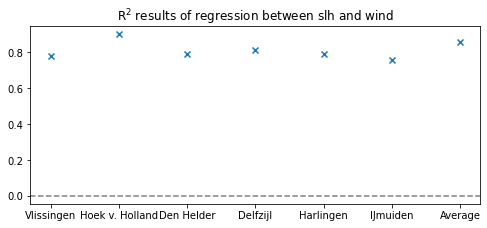

In [99]:
figs.plot_obs_result_per_station(results_era5, 'R$^2$', model, data_type, period = period)

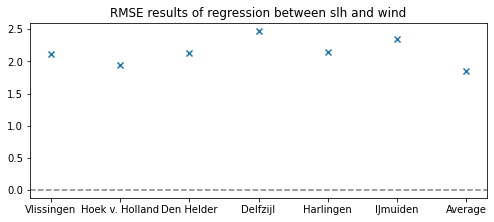

In [100]:
figs.plot_obs_result_per_station(results_era5, 'RMSE', model, data_type, period = period)

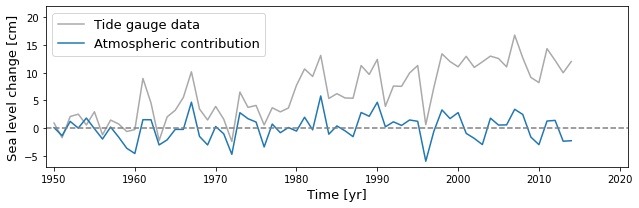

In [101]:
figs.plot_obs_timeseries_one_station_tg_ac(tg_data, timeseries_era5, 'Average', model, 'era5', title = False, period = period)

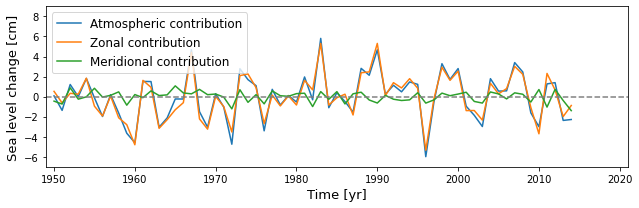

In [102]:
figs.plot_obs_timeseries_one_station_ac_u_v(tg_data, timeseries_era5, 'Average', model, 'era5', title = False, period = period)

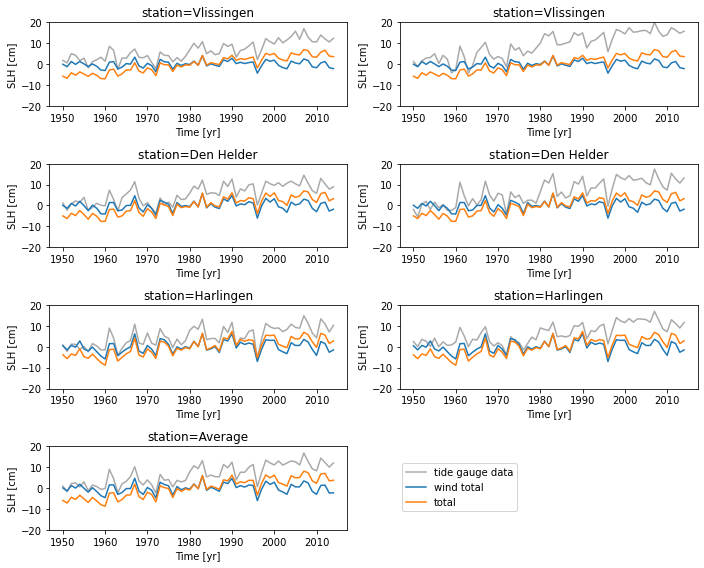

In [103]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['wind total', 'total'], model, data_type, period = period)

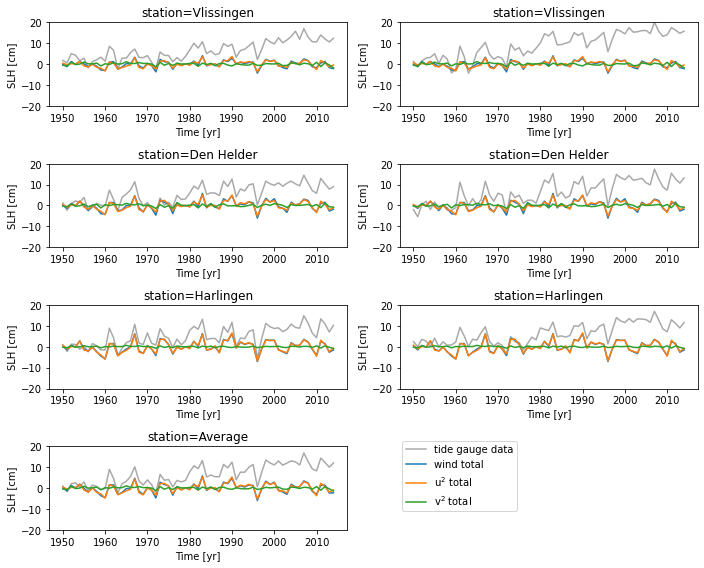

In [104]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['wind total', 'u$^2$ total', 'v$^2$ total'], model, data_type, period = period)

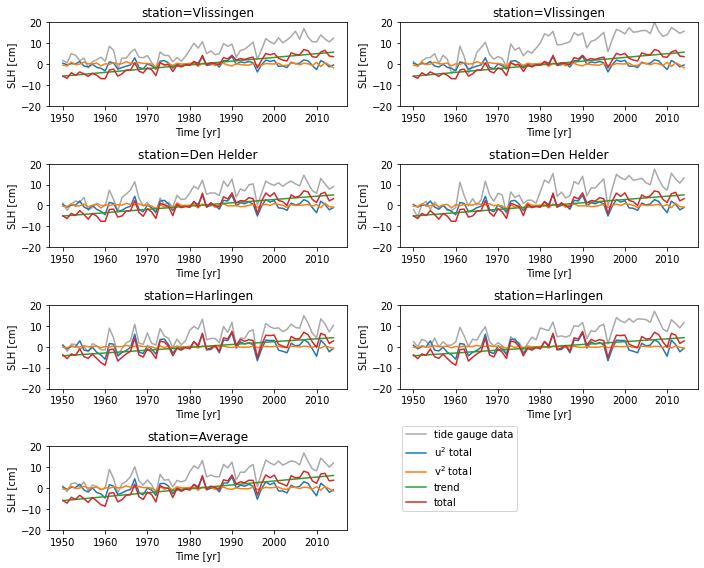

In [105]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['u$^2$ total', 'v$^2$ total', 'trend', 'total'], model, data_type, period = period)

#### Plot trends

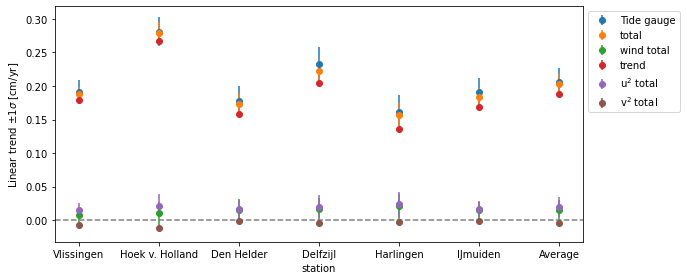

In [106]:
figs.plot_obs_trends_timeseries_per_station(tg_data, timeseries_era5, ['total', 'wind total', 'trend', 'u$^2$ total', 'v$^2$ total'], 
                                            model, data_type, period = period)

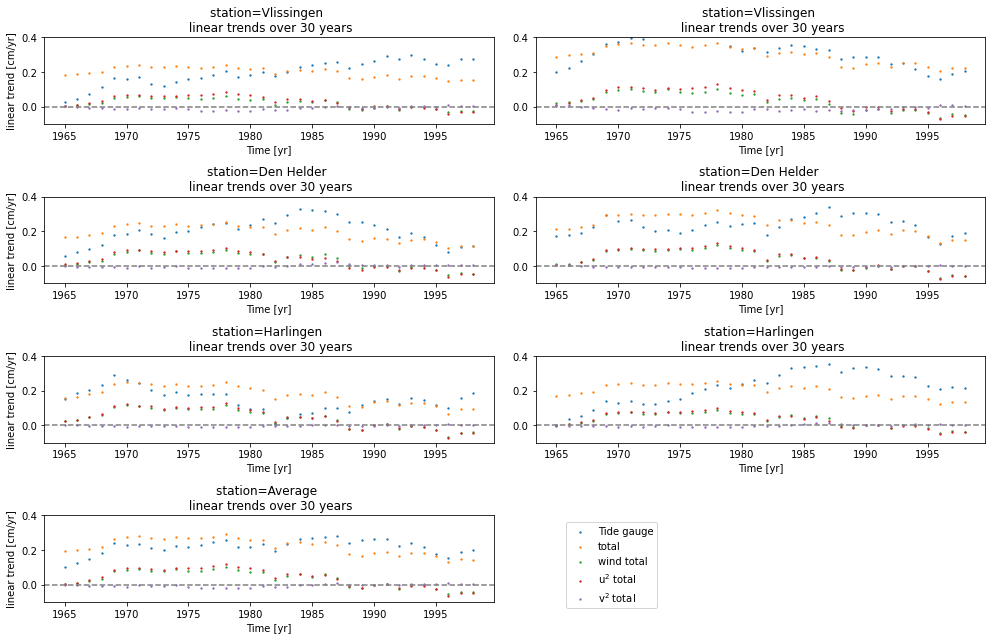

In [107]:
figs.plot_obs_decadal_trends_timeseries_per_station(tg_data, timeseries_era5, ['total', 'wind total', 'u$^2$ total', 'v$^2$ total'], 
                                                    30, model, data_type, errorbar = False, period = period)

## 20cr observational data

In [108]:
data_type = '20cr'

#### Import and plot tide gauge data

In [109]:
# Open data file
tg_data = imprt.import_obs_slh_data(data_type = data_type)

tg_data = tg_data.loc[1950:2014]

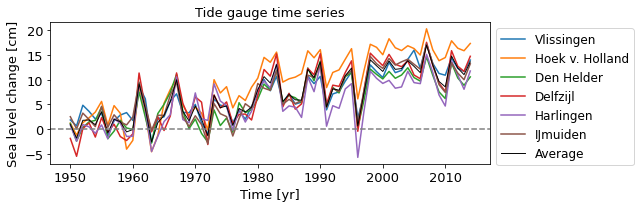

In [110]:
figs.plot_tg_data(tg_data, period = period)

#### Import and plot nearby wind data

In [111]:
wind_data_20cr = imprt.import_obs_wind_data(model = model, data_type = data_type)

wind_data_20cr = wind_data_20cr.loc[1950:2014]

In [112]:
wind_data_20cr

Channel                South             Mid-West             \
          u$^2$     v$^2$      u$^2$     v$^2$      u$^2$      v$^2$   
time                                                                   
1950  13.131567  2.525947   6.956028  3.265412   8.984353   4.586060   
1951  10.771767  3.037285   4.877127  5.924505   7.580522   7.016577   
1952   5.640618 -1.635485   5.742138 -0.171689   9.442571  -1.499286   
1953   3.870445  0.762535   4.832270  1.469169   8.867035   2.563210   
1954  12.066851  0.724793  10.595173  2.505551  14.643506   3.643354   
...         ...       ...        ...       ...        ...        ...   
2010   1.946908 -0.755046   1.840153 -0.763727   2.488971  -0.529688   
2011  10.969078  3.115381   8.155463  3.485028  13.435661   6.483733   
2012  10.027008  1.991190   6.809952  2.736764  10.189938   1.982328   
2013   3.313218  1.547087   2.263472  2.715020   5.177427   4.285154   
2014  10.876112  6.425111   5.115736  9.385818   7.802488  13.314934   

       Mid-East            North-West            North-East             
          u$^2$      v$^2$      u$^2$      v$^2$      u$^2$      v$^2$  
time                                                                    
1950   9.049473   3.531325   6.905759   7.605834   4.688348   6.013059  
1951   7.597651   7.461089   5.939362   9.467622   3.367482  10.546244  
1952   9.720849  -0.106664   8.756828  -1.558380   5.952678   0.166405  
1953   9.614071   2.221756   9.201693   6.223838   6.639224   5.003257  
1954  12.240245   5.284661   8.510157   6.004616   4.189277   8.304004  
...         ...        ...        ...        ...        ...        ...  
2010   2.175649  -1.490769   1.885965  -0.351099  -0.160651  -0.817963  
2011  13.715880   5.262648  14.429358  11.633640  10.596898   9.564071  
2012  10.420673   2.108283  10.758274   0.440513   6.598078   2.038419  
2013   5.956827   3.209796   8.885650   7.610978   6.540488   5.776588  
2014   5.428218  11.872807   7.111277  17.830263   0.915726  18.478556  

[65 rows x 12 columns]

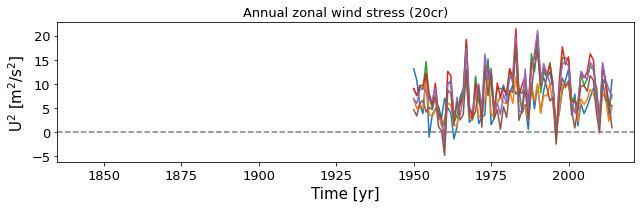

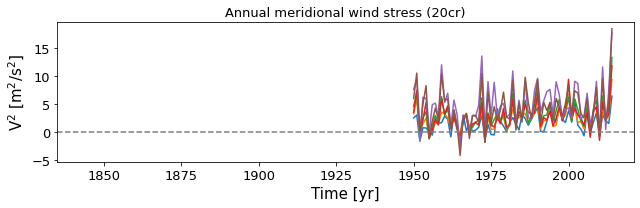

In [113]:
figs.plot_obs_wind_data(wind_data_20cr, model = model, data_type = data_type, period = period)

### Perform regression

In [114]:
results_20cr, timeseries_20cr, significance_20cr, r2_df = regres.regression_obs(wind_data_20cr, tg_data, wind_model = model, data_type = data_type)

In [115]:
r2_df

,R$^2$,R$^2_{wind}$,R$^2_{u^2}$,R$^2_{v^2}$,R$^2_{tr}$,R$^2_{adj}$,"R$^2_{adj, wind}$","R$^2_{adj, u^2}$","R$^2_{adj, v^2}$","R$^2_{adj, tr}$"
station,,,,,,,,,,
Vlissingen,0.797595,0.236701,0.250415,0.007025,0.667153,0.76868,0.127659,0.143331,-0.134829,0.619603
Hoek v. Holland,0.904746,0.300431,0.294033,0.000027,0.745171,0.889159,0.185956,0.178511,-0.163605,0.703472
Den Helder,0.822456,0.444046,0.381798,0.067178,0.556208,0.793403,0.353072,0.280638,-0.085466,0.483588
Delfzijl,0.820351,0.406116,0.382227,0.069444,0.606173,0.798289,0.333183,0.306361,-0.044835,0.557808
Harlingen,0.785011,0.520939,0.51593,0.036691,0.44187,0.758609,0.462107,0.456483,-0.08161,0.373328
IJmuiden,0.78615,0.368006,0.310692,0.097406,0.593974,0.7556,0.277721,0.21222,-0.031536,0.53597
Average,0.862864,0.398248,0.377286,0.029323,0.649453,0.837468,0.286812,0.261969,-0.150432,0.584537


In [116]:
results_20cr

,R$^2$,R$^2_{wind}$,R$^2_{u^2}$,R$^2_{v^2}$,RMSE,constant,Channel u$^2$,Channel v$^2$,South u$^2$,South v$^2$,Mid-West u$^2$,Mid-West v$^2$,Mid-East u$^2$,Mid-East v$^2$,North-West u$^2$,North-West v$^2$,North-East u$^2$,North-East v$^2$,trend
station,,,,,,,,,,,,,,,,,,,
Vlissingen,0.797466,0.236689,0.250400,0.006914,2.095950,6.949413,0.000000,0.176032,0.000000,-0.471543,0.886962,0.0,0.587684,0.000000,0.041395,-1.267317,0.000000,1.140301,3.517992
Hoek v. Holland,0.904548,0.300424,0.294026,0.000000,1.961016,9.443387,0.000000,1.230688,0.000000,-2.090170,2.114032,-0.0,0.098748,0.746459,0.000000,-0.785145,0.337555,0.395342,4.998278
Den Helder,0.822155,0.444038,0.381788,0.067119,2.000759,5.953452,-0.104316,1.405458,-0.000000,-1.585114,1.974096,0.0,0.057519,1.069977,0.286017,-1.068981,0.000000,-0.000000,2.980162
Delfzijl,0.818795,0.406006,0.382110,0.064404,2.495228,6.842210,-0.000000,0.411837,0.000000,-0.000000,1.331369,-0.0,0.061839,-0.000000,0.000000,-0.330424,1.270641,-0.144252,3.774401
Harlingen,0.784687,0.520920,0.515911,0.034361,2.257246,5.314375,-0.091820,0.198376,1.144858,-0.000000,0.631529,-0.0,0.000000,-0.000000,1.281151,-0.318317,0.000000,-0.000000,2.522658
IJmuiden,0.785978,0.367998,0.310683,0.097347,2.282213,6.817043,0.000000,0.994303,0.000000,-0.658947,0.574395,0.0,1.279009,0.000000,0.077832,-1.617062,0.000000,1.202321,3.272435
Average,0.862731,0.398240,0.377278,0.029202,1.871211,6.886647,-0.068128,0.725935,0.000000,-0.494032,1.598634,0.0,0.247583,0.060681,0.482182,-0.761901,0.000000,0.201274,3.513627


In [117]:
timeseries_20cr['Average']

,Channel u$^2$,Channel v$^2$,South u$^2$,South v$^2$,Mid-West u$^2$,Mid-West v$^2$,Mid-East u$^2$,Mid-East v$^2$,North-West u$^2$,North-West v$^2$,...,trend,total,wind total,Channel,South,Mid-West,Mid-East,North-West,u$^2$ total,v$^2$ total
time,,,,,,,,,,,,,,,,,,,,,
1950,-0.120299,0.367998,0.0,-0.254195,-0.087734,0.0,-0.031216,0.019468,-0.198127,-0.511216,...,-5.992862,-6.716277,-0.723415,0.247699,-0.254195,-0.087734,-0.011747,-0.709342,-0.437375,-0.286040
1951,-0.077739,0.586889,-0.0,-0.977549,-0.608206,0.0,-0.107119,0.118795,-0.296480,-0.885230,...,-5.805585,-7.711001,-1.905417,0.509149,-0.977549,-0.608206,0.011675,-1.181710,-1.089544,-0.815872
1952,0.014802,-1.413402,-0.0,0.680800,0.082151,-0.0,0.003885,-0.072483,-0.009737,1.329780,...,-5.618308,-5.232165,0.386143,-1.398600,0.680800,0.082151,-0.068598,1.320043,0.091102,0.295041
1953,0.046728,-0.386872,-0.0,0.234437,-0.131230,-0.0,-0.001698,-0.013632,0.035538,-0.233587,...,-5.431031,-5.844978,-0.413947,-0.340144,0.234437,-0.131230,-0.015329,-0.198049,-0.050660,-0.363287
1954,-0.101097,-0.403029,0.0,-0.047490,2.010404,0.0,0.135603,0.063785,-0.034842,-0.189548,...,-5.243754,-3.592064,1.651690,-0.504125,-0.047490,2.010404,0.199388,-0.224389,2.010069,-0.358379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,0.081420,-1.036509,-0.0,0.841853,-2.495904,-0.0,-0.390590,-0.107467,-0.709008,1.087250,...,5.243754,2.231005,-3.012749,-0.955090,0.841853,-2.495904,-0.498058,0.378242,-3.514083,0.501334
2011,-0.081298,0.620320,0.0,-0.313937,1.562594,0.0,0.212752,0.063228,0.567576,-1.320360,...,5.431031,7.029109,1.598078,0.539022,-0.313937,1.562594,0.275980,-0.752785,2.261623,-0.663545
2012,-0.064308,0.139083,0.0,-0.110387,0.359238,-0.0,0.040473,-0.016500,0.193957,0.928223,...,5.618308,6.961393,1.343085,0.074775,-0.110387,0.359238,0.023973,1.122180,0.529361,0.813724


In [118]:
significance_20cr.T

reggression_contributor,Channel u$^2$,Channel v$^2$,South u$^2$,South v$^2$,Mid-West u$^2$,Mid-West v$^2$,Mid-East u$^2$,Mid-East v$^2$,North-West u$^2$,North-West v$^2$,North-East u$^2$,North-East v$^2$,trend,total,wind total
Vlissingen,True,False,True,False,True,False,True,False,True,False,True,False,True,True,True
Hoek v. Holland,True,False,True,False,True,False,True,False,True,False,True,False,True,True,True
Den Helder,True,True,True,False,True,False,True,False,True,False,True,False,True,True,True
Delfzijl,True,True,True,False,True,False,True,False,True,False,True,False,True,True,True
Harlingen,True,False,True,True,True,False,True,False,True,False,True,False,True,True,True
IJmuiden,True,True,True,True,True,False,True,False,True,False,True,False,True,True,True
Average,True,True,True,True,True,False,True,False,True,False,True,False,True,True,True


#### Plot regression results

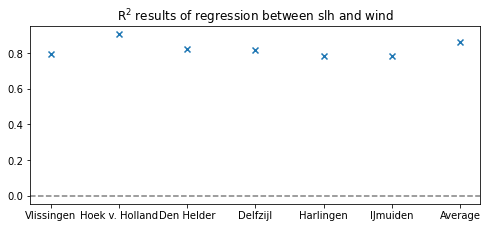

In [119]:
figs.plot_obs_result_per_station(results_20cr, 'R$^2$', model, data_type, period = period)

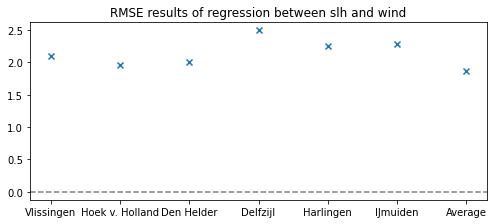

In [120]:
figs.plot_obs_result_per_station(results_20cr, 'RMSE', model, data_type, period = period)

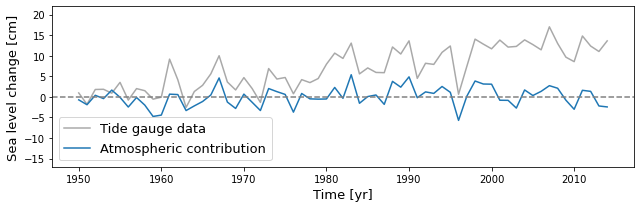

In [121]:
figs.plot_obs_timeseries_one_station_tg_ac(tg_data, timeseries_20cr, 'Average', model, '20cr', title = False, period = period)

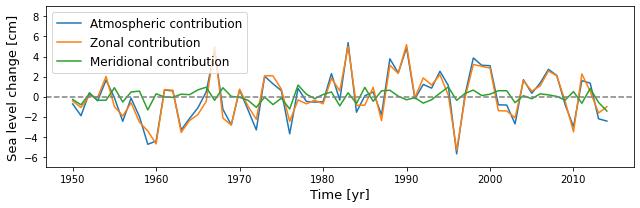

In [122]:
figs.plot_obs_timeseries_one_station_ac_u_v(tg_data, timeseries_20cr, 'Average', model, '20cr', title = False, period = period)

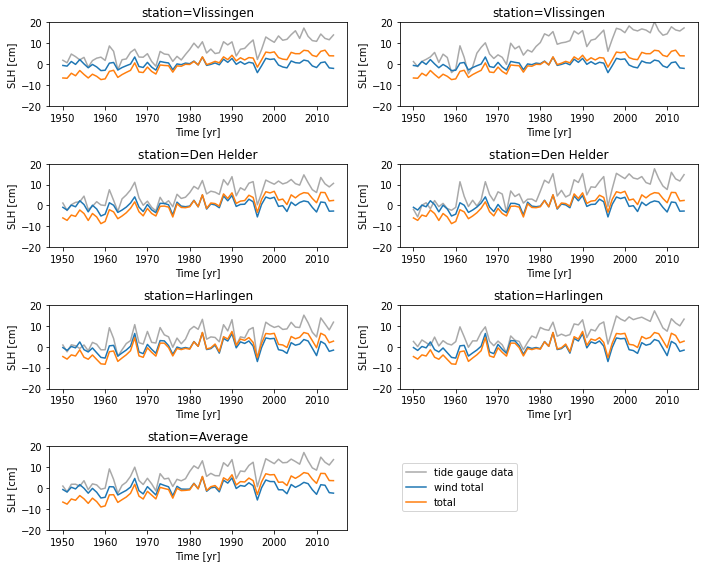

In [123]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['wind total', 'total'], model, data_type, period = period)

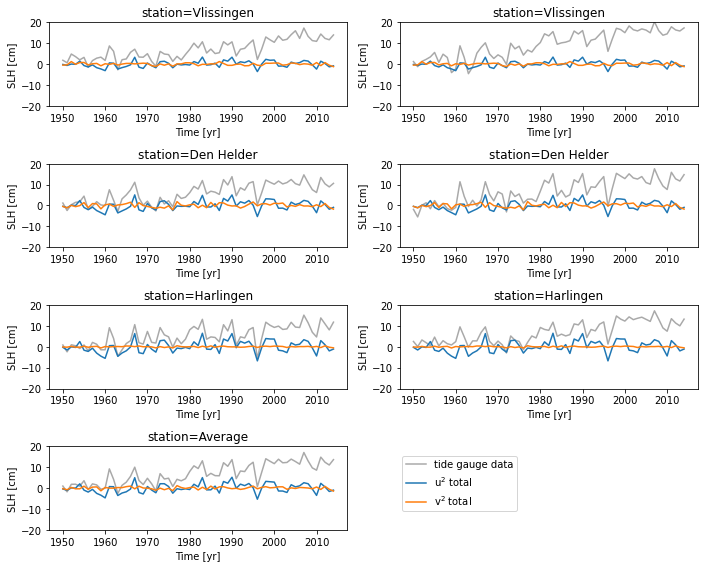

In [124]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['u$^2$ total', 'v$^2$ total'], model, data_type, period = period)

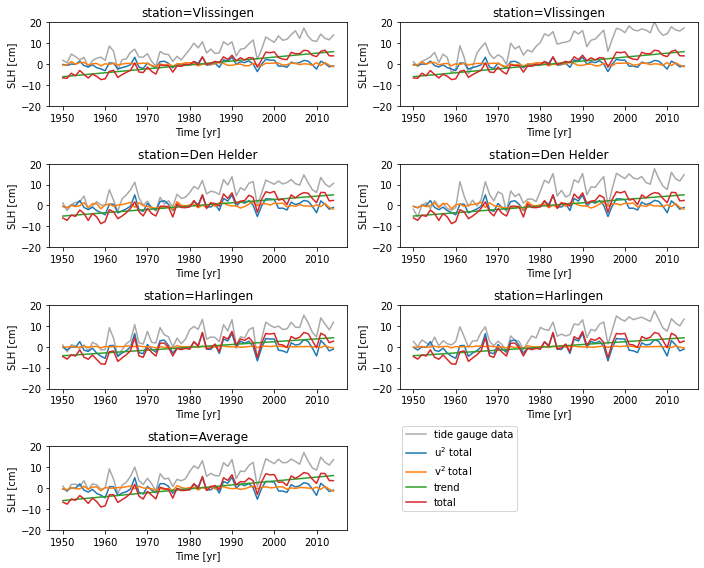

In [125]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['u$^2$ total', 'v$^2$ total', 'trend', 'total'], model, data_type, period = period)

#### Plot trends

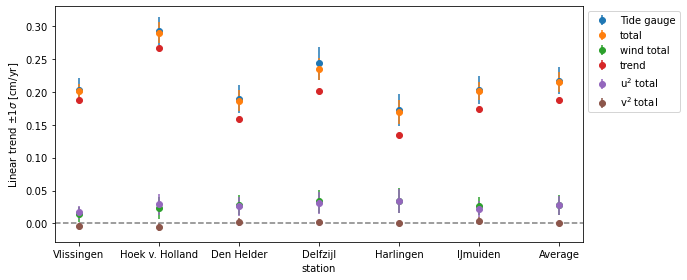

In [126]:
figs.plot_obs_trends_timeseries_per_station(tg_data, timeseries_20cr, ['total', 'wind total', 'trend', 'u$^2$ total', 'v$^2$ total'], 
                                            model, data_type, period = period)

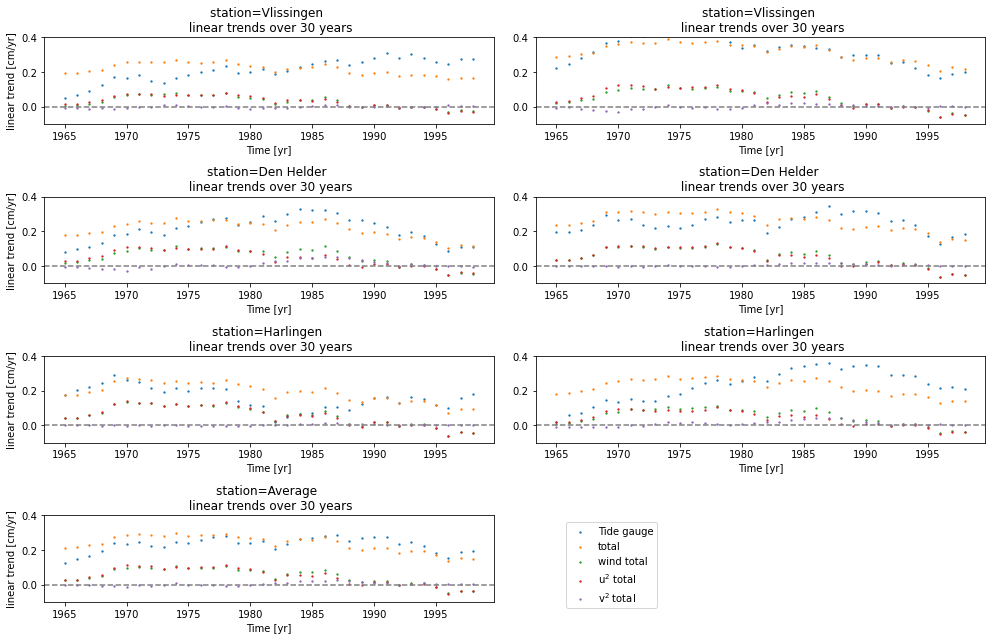

In [127]:
figs.plot_obs_decadal_trends_timeseries_per_station(tg_data, timeseries_20cr, ['total', 'wind total', 'u$^2$ total', 'v$^2$ total'], 
                                                    30, model, data_type, errorbar = False, period = period)

#### Calculate trends

In [130]:
from scipy.stats import linregress
import pandas as pd
import numpy as np

df = pd.DataFrame({'period':[f'{begin}-{end}'], 'trend': [np.nan], 'se': [np.nan]})
df = df.set_index('period')

df = pd.concat([df, df, df], keys = ['ERA5', '20CRv3', 'tg_data'], axis=1)

# ERA5 trends
df['ERA5', 'trend'][f'{begin}-{end}'] = linregress(timeseries_era5.loc[begin:end].index, timeseries_era5['Average', 'wind total'].loc[1950:2014].values).slope*10

# ERA5 standard errors
df['ERA5', 'se'][f'{begin}-{end}'] = linregress(timeseries_era5.loc[1950:2014].index, timeseries_era5['Average', 'wind total'].loc[1950:2014].values).stderr*10

# 20CRv3 trends
df['20CRv3', 'trend'][f'{begin}-{end}'] = linregress(timeseries_20cr.loc[1950:2014].index, timeseries_20cr['Average', 'wind total'].loc[1950:2014].values).slope*10

# 20CRv3 standard errors
df['20CRv3', 'se'][f'{begin}-{end}'] = linregress(timeseries_20cr.loc[1950:2014].index, timeseries_20cr['Average', 'wind total'].loc[1950:2014].values).stderr*10


# Tide gauge trends
df['tg_data', 'trend'][f'{begin}-{end}'] = linregress(tg_data.loc[1950:2014].index, tg_data['Average'].loc[1950:2014].values).slope*10

# Tide gauge standard errors
df['tg_data', 'se'][f'{begin}-{end}'] = linregress(tg_data.loc[1950:2014].index, tg_data['Average'].loc[1950:2014].values).stderr*10


df


ERA5             20CRv3             tg_data          
              trend       se     trend        se     trend        se
period                                                              
1850-2014  0.150898  0.15426  0.279033  0.152674  2.169399  0.200802

In [129]:
(0.42/2.2)*100

19.09090909090909

### 